In [2]:
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   JNJ     1762 non-null   float64
 2   JPM     1762 non-null   float64
 3   XOM     1762 non-null   float64
dtypes: float64(3), object(1)
memory usage: 55.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB
None


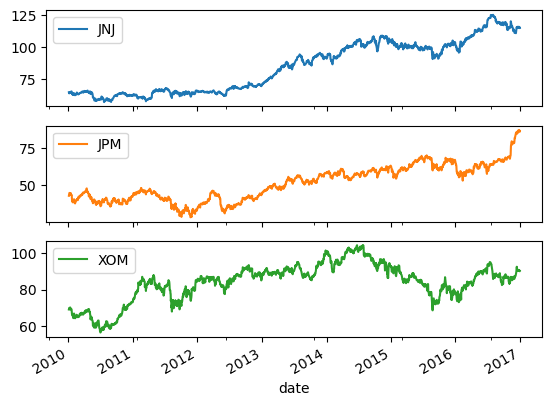

In [8]:
data_folder = 'data/stock_data/nyse.csv'
data = pd.read_csv()

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index("date", inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True);



In [19]:
import os
import matplotlib.pyplot as plt 
data_path = 'data/stock_data/'
yahoo = pd.read_csv(
    os.path.join(data_path, "yahoo.csv"), 
    parse_dates=['date']
)

In [21]:
yahoo.set_index("date", inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


<Axes: >

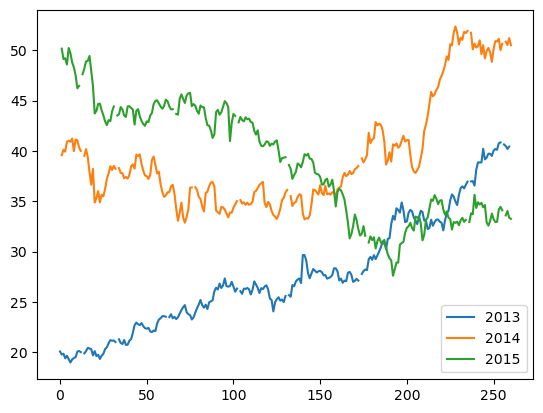

In [22]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013", "2014", "2015"]:
    price_per_year = yahoo.loc[year, ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()



In [32]:
air_quality_folder = "data/air_quality_data"
co = pd.read_csv(
    os.path.join(air_quality_folder, "co_cities.csv"), 
    parse_dates=['date']
)

co.set_index("date", inplace=True)
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

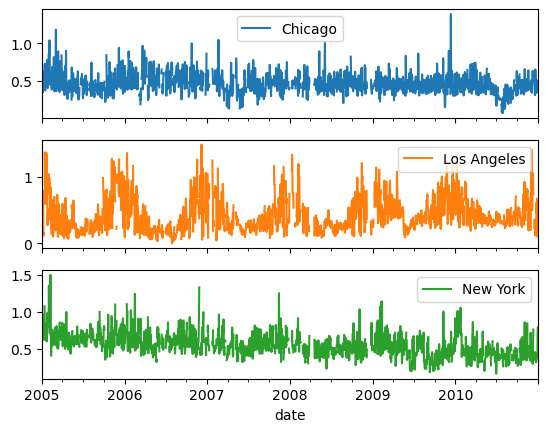

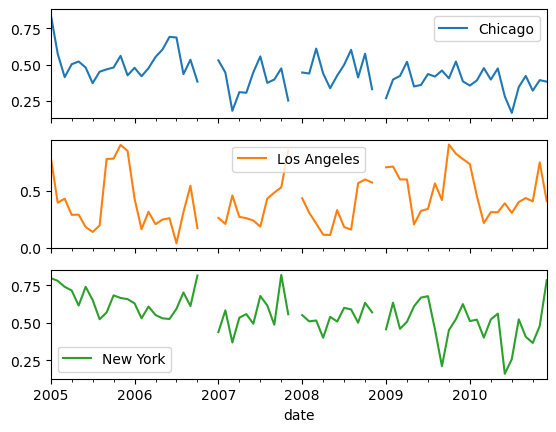

In [33]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq("D")

# Plot the data
co.plot(subplots=True)

# Set frequency to monthly
co = co.asfreq("M")

# Plot the data
co.plot(subplots=True)




In [36]:
google = pd.read_csv(
    os.path.join(data_path, "google.csv"), 
    parse_dates=['Date'], 
    index_col="Date"
)
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


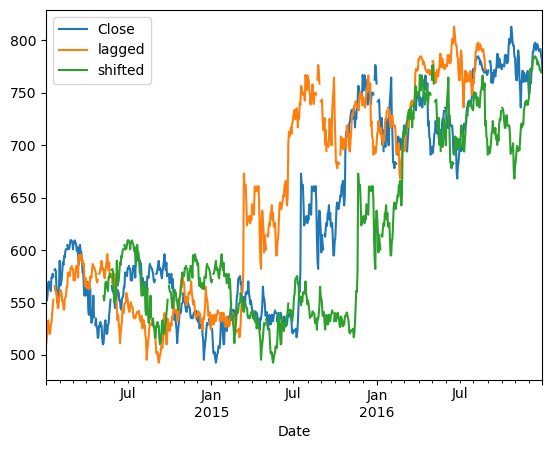

In [37]:

# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted'
google['lagged'] = google["Close"].shift(periods=-90)
google['shifted'] = google["Close"].shift(periods=90)

# Plot the google price series
google.plot()
plt.show()




In [38]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo["price"].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo["price"].sub(yahoo["shifted_30"])

# Get the 30-day price difference
yahoo['diff_30'] = yahoo["price"].diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo["change_30"].sub(yahoo["diff_30"]).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


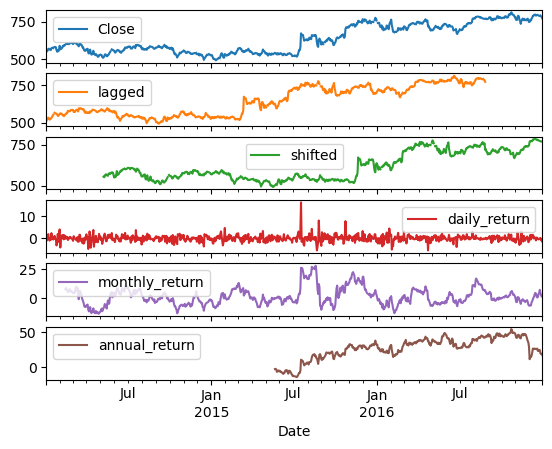

In [40]:
# Create daily_return
google['daily_return'] = google["Close"].pct_change(periods=1).multiply(100)

# Create monthly_return
google['monthly_return'] = google["Close"].pct_change(periods=30).multiply(100)

# Create annual_return
google['annual_return'] = google["Close"].pct_change(periods=360).multiply(100)

# Plot the result
google.plot(subplots=True)
plt.show()



In [47]:
prices = pd.read_csv(
    os.path.join(data_path, "asset_classes.csv"), 
    parse_dates=['DATE'], 
    index_col="DATE"
)
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [48]:
first_prices = prices.iloc[0]
print(first_prices)

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64


<Axes: xlabel='DATE'>

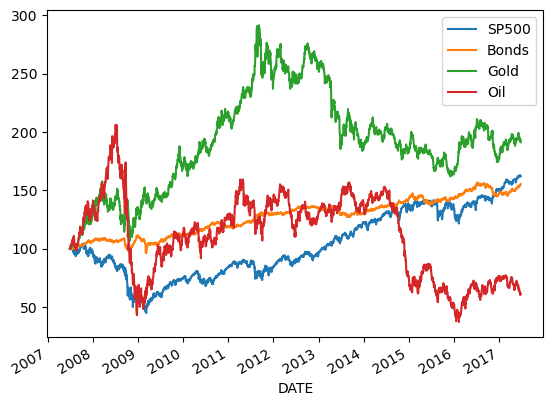

In [49]:
normalized = prices.div(first_prices).mul(100)
normalized.plot()

In [51]:
stocks = pd.read_csv(
    os.path.join(data_path, "nyse.csv"), 
    parse_dates=['date'], 
    index_col="date"
)
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [52]:
dow_jones = pd.read_csv(
    os.path.join(data_path, "dow_jones.csv"), 
    parse_dates=['date'], 
    index_col="date"
)
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


<Axes: xlabel='date'>

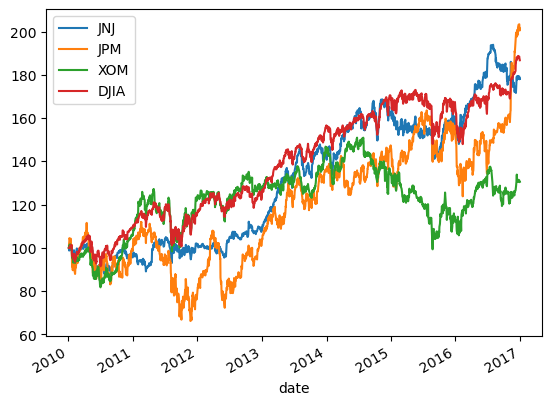

In [53]:
data = pd.concat([stocks, dow_jones], axis=1)
first_row = data.iloc[0]
normalized = data.div(first_row).mul(100)
normalized.plot()

In [54]:
tickers = ["MSFT", "AAPL"]
stocks = pd.read_csv(
    os.path.join(data_path, "msft_aapl.csv"), 
    parse_dates=['date'], 
    index_col="date"
)
stocks.head()



,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [55]:
sp500 = pd.read_csv(
    os.path.join(data_path, "sp500.csv"), 
    parse_dates=['date'], 
    index_col="date"
)
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [58]:
data = pd.concat([stocks, sp500], axis=1).dropna()

normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


<Axes: xlabel='date'>

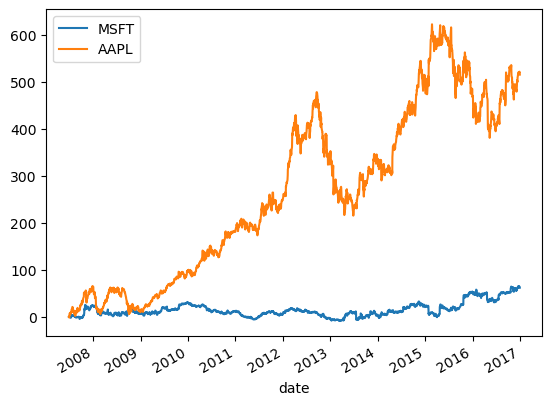

In [67]:
normalized[tickers].sub(normalized["SP500"], axis=0).plot()

In [72]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print("_"*50)
print(monthly.reindex(weekly_dates, method='bfill'))
print("_"*50)
print(monthly.reindex(weekly_dates, method='ffill'))




2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
__________________________________________________
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
__________________________________________________
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           NaN
2010-01-10       NaN           NaN
2010-01-17       NaN           NaN
2010-01-24       NaN           NaN
2010-01-31       NaN           NaN
            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           9.8
2010-01-10       NaN           9.8
2010-01-17       NaN           9.8
2010-01-24       NaN           9.8
2010-01-31       NaN           9.8
            Debt/GDP  Unemployment
date                              
2010-01-03  87.00386           9.8
2010-01-10  87.00386           9.8
2010-01-17  87.00386           9.8
2010-01-24  87.00386           9.8
2010-01-31  87.00386           9.8


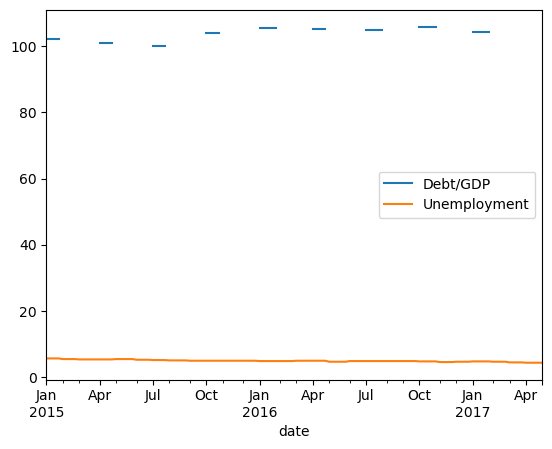

In [76]:
# Import data here
data = pd.read_csv(
    os.path.join(data_path, 'debt_unemployment.csv'), 
    parse_dates=['date'], 
    index_col='date'
)

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 4.1 KB
None


<Axes: xlabel='date'>

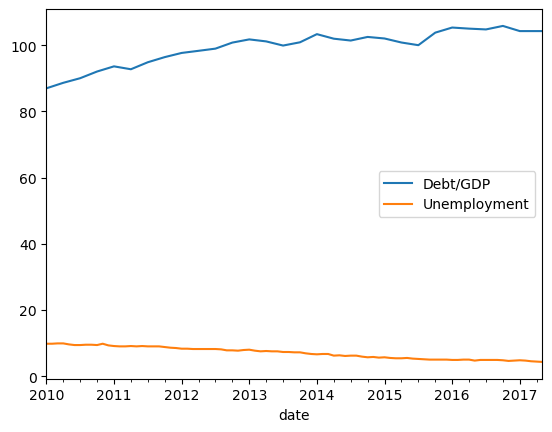

In [77]:

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 4.1 KB
None


<Axes: xlabel='date'>

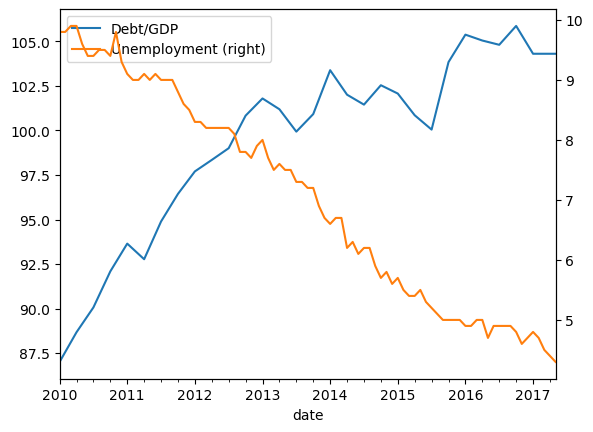

In [78]:


# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


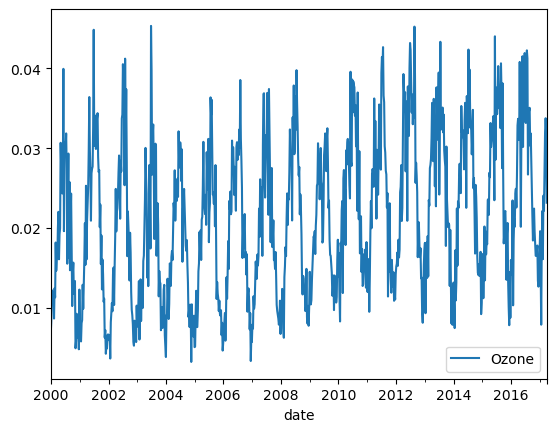

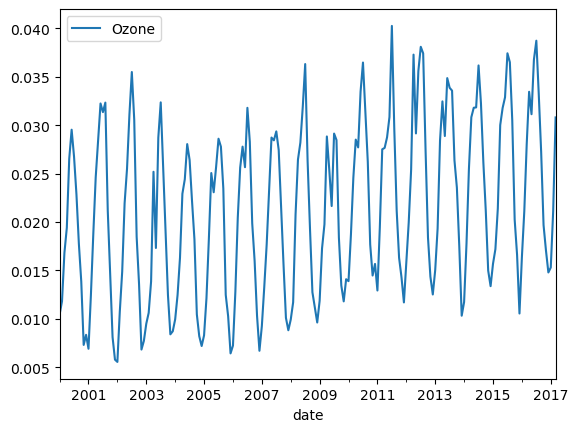

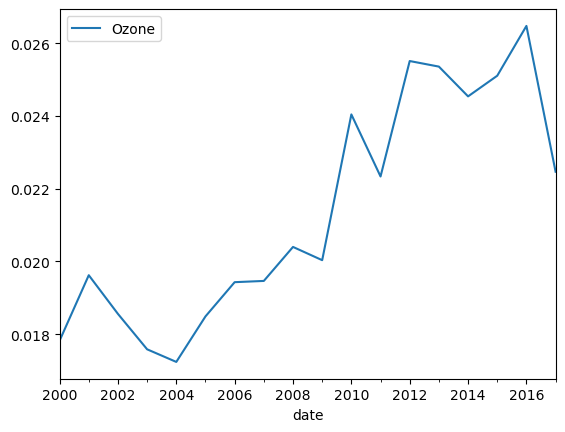

In [80]:
# Import and inspect data here
ozone = pd.read_csv(
    os.path.join(air_quality_folder, "ozone_nyc.csv"), 
    parse_dates=["date"], 
    index_col="date"
)

ozone.info()


# Calculate and plot the weekly average ozone trend
ozone.resample("W").mean().plot()
plt.show()


# Calculate and plot the monthly average ozone trend
ozone.resample("M").mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample("Y").mean().plot()
plt.show()


In [91]:
# Import and inspect data here
stocks = pd.read_csv(
    os.path.join(data_path, "stock_data.csv"),
    parse_dates=["Date"], 
    index_col="Date"
)
print(stocks.head())




             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30   
2010-01-06  30.14  56.79  132.25  4.53  24.25  174.26  32.22  25.56  27.29   
2010-01-07  30.08  56.27  130.00  4.50  24.56  177.67  32.77  25.39  26.96   
2010-01-08  30.28  56.77  133.52  4.52  24.66  174.31  33.15  25.40  27.05   

              RIO    TEF    UPS  
Date                             
2010-01-04  56.03  28.55  58.18  
2010-01-05  56.90  28.53  58.28  
2010-01-06  58.64  28.23  57.85  
2010-01-07  58.65  27.75  57.41  
2010-01-08  59.30  27.57  60.17  


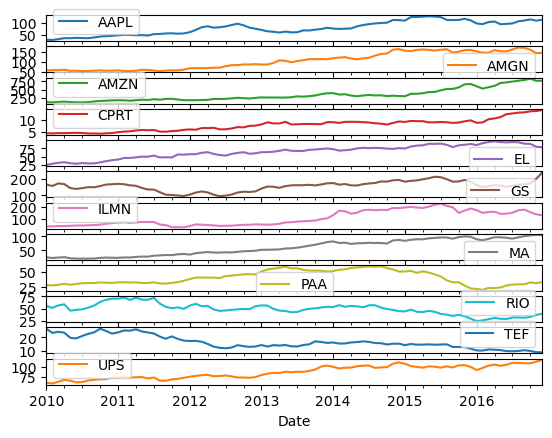

In [92]:
# Calculate and plot the monthly averages
monthly_average = stocks.resample("M").mean()
monthly_average.plot(subplots=True)
plt.show()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


<Axes: xlabel='date'>

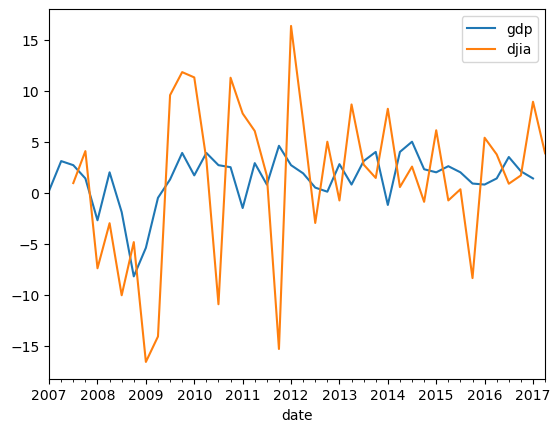

In [94]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv(
    os.path.join(data_path, "gdp_growth.csv"), 
    parse_dates=["date"], 
    index_col="date"
)
gdp_growth.info()


# Import and inspect djia here
djia = pd.read_csv(
    os.path.join(data_path, 'djia.csv'), 
    parse_dates=["date"],
    index_col="date"
)
djia.info()


# Calculate djia quarterly returns here 
djia_quarterly = djia.resample("QS").first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)

data.columns = ["gdp", "djia"]
data.plot()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


<Axes: xlabel='date'>

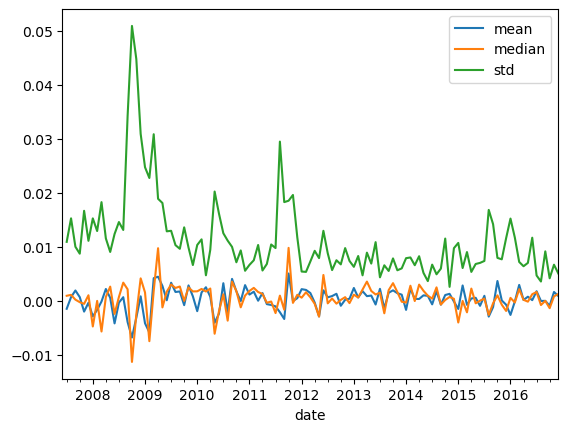

In [95]:
# Import data here
sp500 = pd.read_csv(
    os.path.join(data_path, "sp500.csv"), 
    parse_dates=["date"], 
    index_col="date"
)
sp500.info()

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample("M").agg(["mean", "median", "std"])

# Plot stats here
stats.plot()


